#### It's assumed that you are already familiar with concepts such as linear algebra, in particular with matrices and vectors. We will use python library "Numpy" and also internal functions of PyTorch for work with these basic objects of linear algebra.

In [1]:
import torch
import torch.nn as nn

import numpy as np
from sklearn.metrics import r2_score, explained_variance_score
import matplotlib.pyplot as plt

In [2]:
# torch.nn.Module allows us to build custom classes
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features, in_data, target_data):
        # in_features - the number of inputs, out_features - the number of outputs of our network
        super().__init__()
        self.X = in_data
        self.y = target_data
        self.linear = nn.Linear(in_features, out_features) # define a linear model
    
    def get_params(self):
        # Function parameters() returns values of weigth and bias
        # In our case, function will return torch.tensor([[weigt]]) and torch.tensor([bias])
        [w, b] = self.parameters()
        return w[0][0].item(), b[0].item()
    
    def build_plot(self):
        weight, bias = self.get_params()
        x1 = np.array([-35, 35])
        y1 = weight*x1 + bias
        fig, ax = plt.subplots(figsize=(13,5))
        ax.plot(x1, y1, 'r', label="Fitted line")
        ax.scatter(self.X, self.y, label="Original data")
        ax.set_xlabel("X", fontsize=15)
        ax.set_ylabel("y", fontsize=15)
        plt.legend()
        plt.show()
        
    def forward(self):
        y_pred = self.linear(self.X)
        return y_pred

In [3]:
X = torch.randn(100, 1) * 15
y = X + 10*torch.randn(100, 1)

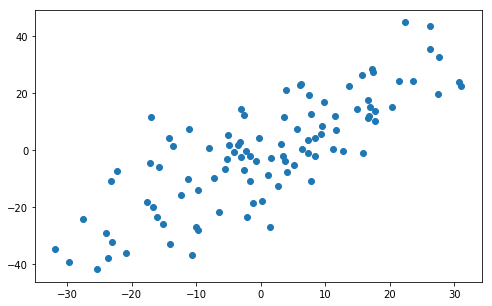

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(X.numpy(), y.numpy(), 'o');

In [5]:
linear_model = LinearRegression(1, 1, X, y)

### Model without training

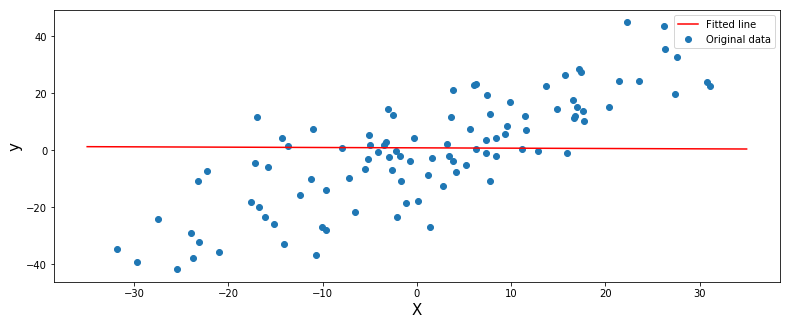

Weight = -0.011715531349182129, 
bias = 0.7907326221466064


In [6]:
# Building plot
linear_model.build_plot()
 
w, b = linear_model.get_params()
print(f"Weight = {w}, \nbias = {b}")

In [7]:
# Set Mean Squared Error as a loss function
criterion = nn.MSELoss()

# Set stochastic gradient descent
# More: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
optimiser = torch.optim.SGD(linear_model.parameters(), lr=0.001)
epoches = 100
losses = []

### Training

In [8]:
for epoch in range(epoches):
    y_pred = linear_model.forward()
    loss = criterion(y_pred, linear_model.y)
    losses.append(loss.item())
    # Zero value of the gradient descent that it doesn't accumulate
    optimiser.zero_grad()
    
    # Run an algorithm of backpropagation
    loss.backward()
    
    # Update our weights
    optimiser.step()
    
    if epoch % 10 == 0:
        print(f"{epoch}/{epoches}, loss = {loss.item()}")

0/100, loss = 370.18377685546875
10/100, loss = 132.42649841308594
20/100, loss = 132.26336669921875
30/100, loss = 132.1093292236328
40/100, loss = 131.96131896972656
50/100, loss = 131.819091796875
60/100, loss = 131.68243408203125
70/100, loss = 131.55111694335938
80/100, loss = 131.42494201660156
90/100, loss = 131.30369567871094


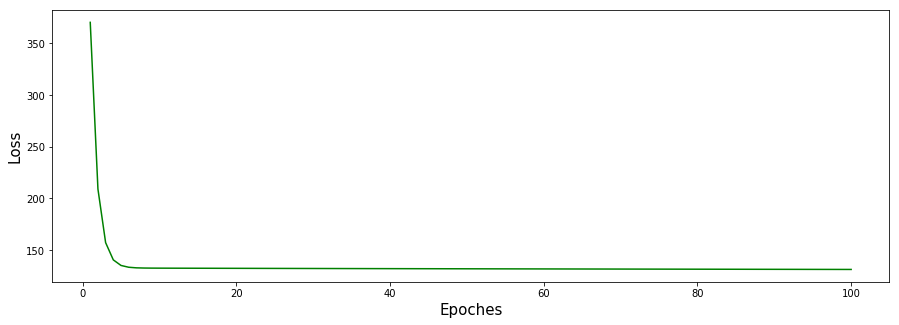

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot([i+1 for i in range(epoches)], losses, c='g')
ax.set_xlabel("Epoches", fontsize=15)
ax.set_ylabel("Loss", fontsize=15)
plt.show()

### Trained model

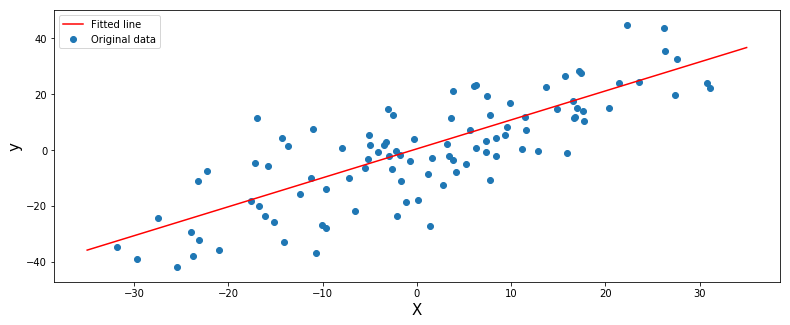

Weight = 1.037488579750061, 
bias = 0.42066413164138794


In [10]:
linear_model.build_plot()

w, b = linear_model.get_params()
print(f"Weight = {w}, \nbias = {b}")

### Some characteristics of model

In [11]:
y_pred = linear_model.forward().detach().numpy()

In [12]:
r2_score = r2_score(y_pred, y.numpy())
explained_var = explained_variance_score(y_pred, y.numpy())

In [13]:
print(f"Coefficient of determination = {round(r2_score, 4)}")
print(f"Explained variation = {round(explained_var, 4)}")

Coefficient of determination = 0.435
Explained variation = 0.4473
